In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import os
from numpy import mean 
from numpy import std 
import keras
from sklearn.model_selection import KFold 
from keras.datasets import fashion_mnist 
from keras.utils import np_utils 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras import callbacks 
from keras.optimizers import SGD 
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cv2
import timeit
from keras.layers import Dropout 



In [3]:
!mkdir MyDrive

In [4]:
!mount --bind /content/drive/My\ Drive /content/MyDrive

In [5]:
os.chdir("/content/MyDrive/AI_VAR/LAB3/")

In [6]:
#!pip install keras

In [7]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
# summarize loaded dataset 
print('Train: X={}, Y={}'.format(trainX.shape, trainY.shape)) 
print('Test: X={}, Y={}'.format(testX.shape, testY.shape)) 

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


In [9]:
from google.colab.patches import cv2_imshow
for i in range(1, 10):
  img = trainX[i-1]
  cv2_imshow(img)

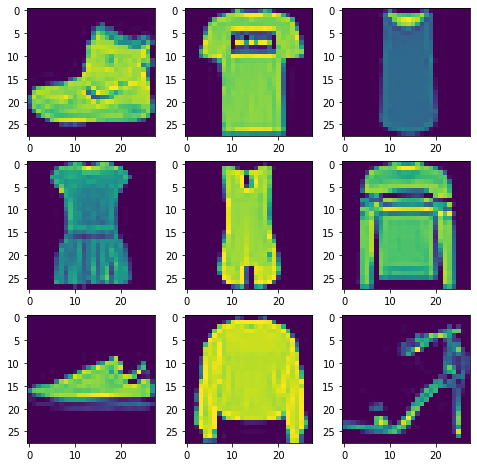

In [10]:
%matplotlib inline 
fig=plt.figure(figsize=(8, 8))
col = 3
row = 3
for i in range(1, col*row +1):
    img = trainX[i-1]
    fig.add_subplot(row, col, i)
    plt.imshow(img)
plt.show()

In [11]:
def prepareData(trainX, trainY, testX, testY):

  #TODO - Application 1 - Step 3 - reshape the data to be of size [samples][width][height][channels]
  trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32') 
  testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32') 

    #TODO - Application 1 - Step 4 - normalize the input values
  trainX = trainX / 255 
  testX = testX / 255 

    #TODO - Application 1 - Step 5 - Transform the classes labels into a binary matrix
  trainY = np_utils.to_categorical(trainY) 
  testY = np_utils.to_categorical(testY) 
  num_classes = testY.shape[1]  

  return trainX, trainY, testX, testY

In [12]:
def defineModel(input_shape, num_classes):

    # Application 1 - Step 6 - Initialize the sequential model
    model = Sequential()

    #TODO - Application 1 - Step 6 - Create the first hidden layer as a convolutional layer
    model.add(keras.Input(shape=input_shape))  # 28x28x1 images
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", kernel_initializer='he_uniform'))

    #TODO - Application 1 - Step 6 - Define the pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 1 - Exercise 6 - Add a dropout layer
    model.add(Dropout(0.40)) #20% dropout

    #TODO - Application 1 - Step 6 - Define the flatten layer
    model.add(Flatten())

    #TODO - Application 1 - Step 6 - Define a dense layer of size 16
    model.add(Dense(units = 250, activation = "relu", kernel_initializer='he_uniform'))

    #TODO - Application 1 - Step 6 - Define the output layer
    model.add(Dense(10, activation='softmax'))

    #TODO - Application 1 - Step 6 - Compile the model
    sgd = SGD(lr=0.001,  momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


    return model

In [13]:
def trainAndEvaluateClassic(trainX, trainY, testX, testY):

    accuracy = 0

    #Application 1 - Call the defineModel function
    model = defineModel((28, 28, 1), 10)


    # call early stopping
    earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 3,  
                                        restore_best_weights = True) 

    start = timeit.timeit()
    #TODO - Application 1 - Step 7 - Train the model
    history = model.fit(trainX, trainY, epochs = 7, batch_size=8, validation_data=(testX, testY), verbose=1, callbacks =[earlystopping])
    end = timeit.timeit()

    model.save('Fashion_MNIST_model.h5')

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy)+1)
    # plot metrics
    plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'validation val_loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()

    #TODO - Application 1 - Step 7 - Evaluate the model
    loss, accuracy = model.evaluate(testX, testY, verbose=1) 
    print("Accuracy = {:.2f}%".format(accuracy* 100)) 
    print("Convergence time: ", round(end-start, 5))

    return accuracy

In [14]:
def main():

    #TODO - Application 1 - Step 2 - Load the Fashion MNIST dataset in Keras
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data() 

    #TODO - Application 1 - Step 2 - Print the size of the train/test dataset
    print('Train: X={}, Y={}'.format(trainX.shape, trainY.shape)) 
    print('Test: X={}, Y={}'.format(testX.shape, testY.shape)) 

    #TODO - Application 1 - Call the prepareData method
    trainX, trainY, testX, testY = prepareData(trainX, trainY, testX, testY)

    #TODO - Application 1 - Step 7 - Train and evaluate the model in the classic way
    
    trainAndEvaluateClassic(trainX, trainY, testX, testY) 

    #TODO - Application 2 Train and evaluate the model using K-Folds strategy



    #Application 2 - Step2 - System performance presentation
    #summarizeLearningCurvesPerformances(histories, scores)

    return

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)
Epoch 1/7
7500/7500 [==============================] - 22s 3ms/step - loss: 0.4640 - accuracy: 0.8342 - val_loss: 0.3626 - val_accuracy: 0.8677
Epoch 2/7
7500/7500 [==============================] - 21s 3ms/step - loss: 0.3187 - accuracy: 0.8841 - val_loss: 0.3085 - val_accuracy: 0.8850
Epoch 3/7
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2769 - accuracy: 0.8990 - val_loss: 0.2903 - val_accuracy: 0.8937
Epoch 4/7
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2486 - accuracy: 0.9092 - val_loss: 0.2681 - val_accuracy: 0.9018
Epoch 5/7
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2284 - accuracy: 0.9163 - val_loss: 0.2589 - val_accuracy: 0.9055
Epoch 6/7
7500/7500 [==============================] - 21s 3ms/step - loss: 0.2126 - accuracy: 0.9201 - val_loss: 0.2513 - val_accuracy: 0.9077
Epoch 7/7
313/313 [==============================] - 1s 3ms/ste

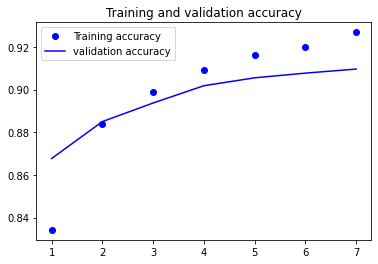

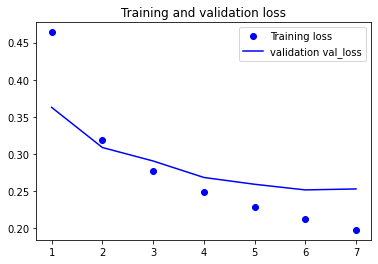

<Figure size 432x288 with 0 Axes>

In [15]:
if __name__ == '__main__':
    main()